In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import utils as ut
import re
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_absolute_error


c:\Users\raulg\Documents\THEBRIDGE_DS\0.-Repo_Git\Material Data Science\Material DS\99-kaggle\tumejorportatil\utils.py:70: SyntaxWarning: invalid escape sequence '\d'
  df['Memory'] = df['Memory'].str.extract('(\d+)').astype(int)


In [2]:
### TODO: Probar random forest, knn, mirar alguno más en apuntes

In [2]:
### Sólo utilizado para limpiar gpus y cpus
df_gpus = pd.read_csv('data/auxiliar/gpu_scoring.csv')
df_cpus = pd.read_csv('data/auxiliar/cpu_scoring.csv')
ut.gpu_cpu_clean(df_gpus,df_cpus)

In [3]:
df_port = pd.read_csv('data/train.csv',index_col=0)
df_gpus = pd.read_csv('data/auxiliar/gpu_clean.csv')
df_cpus = pd.read_csv('data/auxiliar/cpu_clean.csv')
df_company = pd.read_csv('data/auxiliar/company_price.csv')
df_type = pd.read_csv('data/auxiliar/type_price.csv')

In [ ]:
# df_port['Memory'] = df_port['Memory'].str.lower()
# df_port['Memory'] = df_port['Memory'].str.replace("tb","000")
# df_port['Memory'] = df_port['Memory'].str.replace("gb","")
# df_port['ssd']=np.where(df_port['Memory'].str.contains('ssd'),1,0).astype(int)
# df_port['hdd']=np.where(df_port['Memory'].str.contains('hdd'),1,0).astype(int)
# df_port['Memory'] = df_port['Memory'].str.extract('(\d+)').astype(int)
# df_port['Memory'].info()


<class 'pandas.core.series.Series'>
Index: 912 entries, 268 to 1179
Series name: Memory
Non-Null Count  Dtype
--------------  -----
912 non-null    int64
dtypes: int64(1)
memory usage: 14.2 KB


<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\raulg\AppData\Local\Temp\ipykernel_27040\908319739.py:6: SyntaxWarning: invalid escape sequence '\d'
  df_port['Memory'] = df_port['Memory'].str.extract('(\d+)').astype(int)


In [4]:
df_port = ut.var_clean(df_port,df_gpus,df_cpus,df_company,df_type)
df_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               851 non-null    object 
 7   Ram               912 non-null    int64  
 8   Memory            912 non-null    int64  
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    float64
 12  Price_euros       912 non-null    float64
 13  company_price     912 non-null    float64
 14  type_price        912 non-null    float64
 15  screen_val        912 non-null    float64
 16  ips               912 non-null    int64  
 1

c:\Users\raulg\Documents\THEBRIDGE_DS\0.-Repo_Git\Material Data Science\Material DS\99-kaggle\tumejorportatil\utils.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cpu_score'].fillna(df['cpu_score'].mean(),inplace=True)
c:\Users\raulg\Documents\THEBRIDGE_DS\0.-Repo_Git\Material Data Science\Material DS\99-kaggle\tumejorportatil\utils.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inpla

## Código para modelos

In [7]:
df_port_float = df_port[['Ram','Weight','ssd','company_price','type_price','screen_val','ips','intel','ghz','cpu_score','gpu_score','linux','windows','mac','no os','Price_euros']]
df_port_float_sel = df_port[['Ram','company_price','type_price','screen_val','ips','ghz','gpu_score','windows','Price_euros']]

<Axes: >

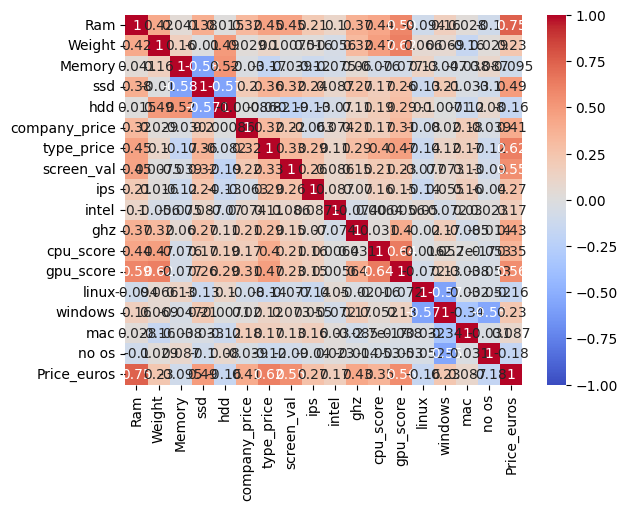

In [6]:
sns.heatmap(df_port_float.corr(), annot=True, cmap='coolwarm', vmin=-1)

<Axes: >

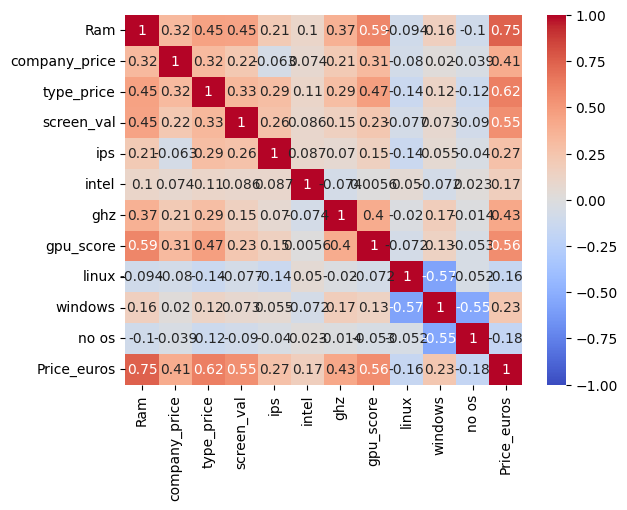

In [8]:
sns.heatmap(df_port_float_sel.corr(), annot=True, cmap='coolwarm', vmin=-1)

In [8]:
print("Lineal sin scaler:\n\n",ut.lin_reg(df_port_float,polim=False,scaler=False,store_val=False))
print("."*50)
print("Lineal con scaler:\n\n",ut.lin_reg(df_port_float,polim=False,store_val=False))
print("."*50)
print("Polim 2:\n\n",ut.lin_reg(df_port_float,polim=True,deg=2,store_val=False))
print("."*50)
print("Polim 3:\n\n",ut.lin_reg(df_port_float,polim=True,deg=3,store_val=False))
print("."*50)
print("Polim 4:\n\n",ut.lin_reg(df_port_float,polim=True,deg=4,store_val=False))
print("."*50)
print("Polim 5:\n\n",ut.lin_reg(df_port_float,polim=True,deg=5,store_val=False))

MAE: 245.77823111099673
RMSE: 363.6858588675739
r2 train 0.751344471511643
r2 test 0.6937588906308402
Cross validation results:
0.7247519382007684 0.026899669702427426
Lineal sin scaler:

 None
..................................................
MAE: 245.7782311098317
RMSE: 363.6858588670257
r2 train 0.751344471511643
r2 test 0.6937588906317635
Cross validation results:
0.7247519381991161 0.026899669701028934
Lineal con scaler:

 None
..................................................
MAE: 235.25707155500865
RMSE: 340.7274704516306
r2 train 0.8677055124017976
r2 test 0.7312026654010103
Cross validation results:
-6.256651364189076e+17 1.2513302728378153e+18
Polim 2:

 None
..................................................
MAE: 1220109500462.8284
RMSE: 9727436538732.984
r2 train 0.9440121273292718
r2 test -2.1908239103531984e+20
Cross validation results:
-2.5206419956998188e+22 4.15201270217514e+22
Polim 3:

 None
..................................................
MAE: 15465119762.088173

In [25]:
print("Lineal sin scaler:\n\n",ut.lin_reg(df_port_float_sel,polim=False,scaler=False,store_val=False))
print("."*50)
print("Lineal con scaler:\n\n",ut.lin_reg(df_port_float_sel,polim=False,store_val=False))
print("."*50)
print("Polim 2:\n\n",ut.lin_reg(df_port_float_sel,polim=True,deg=2,store_val=False))
print("."*50)
print("Polim 3:\n\n",ut.lin_reg(df_port_float_sel,polim=True,deg=3,store_val=False))
print("."*50)
print("Polim 4:\n\n",ut.lin_reg(df_port_float_sel,polim=True,deg=4,store_val=False))
print("."*50)
print("Polim 5:\n\n",ut.lin_reg(df_port_float_sel,polim=True,deg=5,store_val=False))


MAE: 250.48642110674055
RMSE: 371.49087899038904
r2 train 0.7487177230080386
r2 test 0.6804734352945752
Cross validation results:
0.7242270988187756 0.032938089243139346
Lineal sin scaler:

 None
..................................................
MAE: 250.48642110674095
RMSE: 371.4908789903924
r2 train 0.7487177230080386
r2 test 0.6804734352945694
Cross validation results:
0.7242270988187824 0.03293808924313862
Lineal con scaler:

 None
..................................................
MAE: 247.25245389670218
RMSE: 348.1272695617136
r2 train 0.8286114066139556
r2 test 0.7194005939232495
Cross validation results:
-6.074621809810274e+21 1.2149243619620547e+22
Polim 2:

 None
..................................................
MAE: 1174.8604843695095
RMSE: 10023.685308703614
r2 train 0.8914479724310637
r2 test -231.62988554956596
Cross validation results:
-6.404251182124336e+22 1.2759572033797908e+23
Polim 3:

 None
..................................................
MAE: 178717556439.0484

### Mejor modelo

In [8]:
### Sacamos cosas del modelo que mejor pinta tiene
model, x1_train, y1_train, x1_test, y1_test,pol_feat,scaler = ut.lin_reg(df_port_float,polim=True,deg=2)
model2, x2_train, y2_train, x2_test, y2_test,scaler2 = ut.lin_reg(df_port_float,polim=False)
model3, x3_train, y3_train, x3_test, y3_test,pol_feat,scaler = ut.lin_reg(df_port_float,polim=True,deg=3)
model4, x4_train, y4_train, x4_test, y4_test,pol_feat,scaler = ut.lin_reg(df_port_float_sel,polim=True,deg=3)

MAE: 245.59457499549995
RMSE: 353.1982949039968
r2 train 0.8771958247078362
r2 test 0.711166304824556
Cross validation results:
-1.226253530045199e+21 2.449978005006558e+21
MAE: 240.55274041399497
RMSE: 359.36365134806846
r2 train 0.758682376422952
r2 test 0.7009946532484813
Cross validation results:
0.7322299440049974 0.02552410266549478
MAE: 339465484960.4278
RMSE: 2282492766553.5967
r2 train 0.9525771858152043
r2 test -1.2062282057374063e+19
Cross validation results:
-6.824831994126213e+20 8.32438594634045e+20
MAE: 319.8402551848603
RMSE: 814.1609023527553
r2 train 0.8809188580590841
r2 test -0.5347270419351255
Cross validation results:
-18.955669768271527 37.25176904478552


In [34]:
### Aplicamos Gridsearch a Ridge
lm1r = Ridge(max_iter=2000)
gd = GridSearchCV(lm1r, param_grid={'alpha':np.logspace(-3,4,100).tolist()})
gd.fit(x1_train, y1_train)
print(gd.best_estimator_)
print(gd.best_params_)
print(gd.best_score_)

Ridge(alpha=5.5908101825122225, max_iter=2000)
{'alpha': 5.5908101825122225}
0.7561072181255465


In [33]:
### Aplicamos Gridsearch a Lasso
lm1l = Lasso(max_iter=2000)
gd = GridSearchCV(lm1l, param_grid={'alpha':np.logspace(-3,4,100).tolist()})
gd.fit(x1_train, y1_train)
print(gd.best_estimator_)
print(gd.best_params_)
print(gd.best_score_)

c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.011e+07, tolerance: 2.888e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+07, tolerance: 2.946e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Lasso(alpha=0.7924828983539169, max_iter=2000)
{'alpha': 0.7924828983539169}
0.7453630920189354


c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+05, tolerance: 3.855e+04
  model = cd_fast.enet_coordinate_descent(


### Gridsearch a ElasticNet

In [31]:
### Aplicamos Gridsearch a elasticnet
lm1en = ElasticNet(max_iter=2000)
gd = GridSearchCV(lm1en, param_grid={'alpha':np.logspace(-3,4,100).tolist(),'l1_ratio' : np.arange(0.1,1,0.1).tolist()})
gd.fit(x1_train, y1_train)
print(gd.best_estimator_)
print(gd.best_params_)
print(gd.best_score_)

c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.199e+07, tolerance: 2.888e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.914e+07, tolerance: 2.946e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

ElasticNet(alpha=0.011497569953977356, l1_ratio=0.1, max_iter=2000)
{'alpha': 0.011497569953977356, 'l1_ratio': 0.1}
0.7560921396927643


c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.272e+07, tolerance: 3.855e+04
  model = cd_fast.enet_coordinate_descent(


In [38]:
### Creamos modelo con mejor alpha y l1
lm1en = ElasticNet(alpha = 0.011497569953977356,l1_ratio = 0.1,max_iter=10000)
lm1en.fit(x1_train, y1_train)
pred1en = lm1en.predict(x1_test)
print('MAE:', metrics.mean_absolute_error(y1_test, pred1en))
print('RMSE:', metrics.root_mean_squared_error(y1_test, pred1en))
print('='*20)
print('r2 train',lm1en.score(x1_train,y1_train))
print('r2 test',lm1en.score(x1_test,y1_test))
print(pred1en[:5])

MAE: 224.3762083232764
RMSE: 331.4478697691314
r2 train 0.8447624136071981
r2 test 0.7456445052159784
[1514.43840892 1085.01493308  810.93942038  824.54280568 1378.14586884]


### Otros algoritmos

In [10]:
### XGboost, de caja
params = {
    "n_estimators": 5000,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.001,
    "loss": "squared_error",
    "subsample": 0.3
}
xgb = GradientBoostingRegressor(**params)
xgb.fit(x2_train, y2_train)
predxgb = xgb.predict(x2_test)
print('MAE:', metrics.mean_absolute_error(y2_test, predxgb))
print('RMSE:', metrics.root_mean_squared_error(y2_test, predxgb))
print('='*20)
print('r2 train',xgb.score(x2_train,y2_train))
print('r2 test',xgb.score(x2_test,y2_test))

MAE: 193.43963453596004
RMSE: 298.2098623968548
r2 train 0.9078455055063817
r2 test 0.7941007975160219


In [9]:
### XGboost, tras polim 2
params = {
    "n_estimators": 5000,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.001,
    "loss": "squared_error",
    "subsample": 0.25
}
xgb = GradientBoostingRegressor(**params)
xgb.fit(x1_train, y1_train)
predxgb = xgb.predict(x1_test)
print('MAE:', metrics.mean_absolute_error(y1_test, predxgb))
print('RMSE:', metrics.root_mean_squared_error(y1_test, predxgb))
print('='*20)
print('r2 train',xgb.score(x1_train,y1_train))
print('r2 test',xgb.score(x1_test,y1_test))


MAE: 184.23421020765
RMSE: 279.5435409124995
r2 train 0.9254696133124788
r2 test 0.8190704163870963


In [14]:
### Cross val de xgboost
kfold = model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(xgb, x1_train, y1_train, cv=kfold)
print('='*20)
print('Cross validation results:')
print(cv_results.mean(), cv_results.std())

Cross validation results:
0.8171660345187279 0.04311202537153025


In [63]:
### Intentamos regularizar. Aumentamos estimators, reducimos learning rate
params = {
    "n_estimators": 5000,
    "max_depth": 2,
    "min_samples_split": 5,
    "learning_rate": 0.001,
    "loss": "squared_error",
    "subsample": 0.8
}
xgb1 = GradientBoostingRegressor(**params)
xgb1.fit(x1_train, y1_train)
predxgb1 = xgb1.predict(x1_test)
print('MAE:', metrics.mean_absolute_error(y1_test, predxgb1))
print('RMSE:', metrics.root_mean_squared_error(y1_test, predxgb1))
print('='*20)
print('r2 train',xgb1.score(x1_train,y1_train))
print('r2 test',xgb1.score(x1_test,y1_test))

MAE: 212.53695733443968
RMSE: 319.31929844051774
r2 train 0.871486439076576
r2 test 0.7639190236222098


In [ ]:
### xgboost sin regresión polinómica

In [58]:
### xgboost con gridsearch

# Define el modelo
xgbrd = RandomForestRegressor(random_state=42)

# Configura la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],       # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],       # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],       # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]          # Número mínimo de muestras en un nodo hoja
}

# Definir el scorer como Mean Absolute Error (MAE)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Configurar GridSearchCV con el modelo, los hiperparámetros y el scorer
grid_search = GridSearchCV(estimator=xgbrd, param_grid=param_grid, 
                           scoring=mae_scorer, cv=5, n_jobs=-1, verbose=2)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(x1_train, y1_train)

# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor MAE:", -grid_search.best_score_)  # Convierte a positivo

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor MAE: 188.12817917993053


In [ ]:
### Random Forest - último intento desesperado
### max_depth=20,
rfor = RandomForestRegressor(criterion='absolute_error',random_state=42,n_estimators = 3000,bootstrap=True)
rfor.fit(x3_train, y3_train)
predrfor = rfor.predict(x3_test)
print('MAE:', metrics.mean_absolute_error(y3_test, predrfor))
print('RMSE:', metrics.root_mean_squared_error(y3_test, predrfor))
print('='*20)
print('r2 train',rfor.score(x3_train,y3_train))
print('r2 test',rfor.score(x3_test,y3_test))

MAE: 183.3124450546439
RMSE: 306.1925794145195
r2 train 0.97535257523614
r2 test 0.7829299119206805


In [45]:
param_grid = {
    'n_estimators': [100, 200, 300],       # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],       # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],       # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]          # Número mínimo de muestras en un nodo hoja
}

# Definir el scorer como Mean Absolute Error (MAE)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Configurar GridSearchCV con el modelo, los hiperparámetros y el scorer
grid_search = GridSearchCV(estimator=rfor, param_grid=param_grid, 
                           scoring=mae_scorer, cv=5, n_jobs=-1, verbose=2)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(x1_train, y1_train)

# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor MAE:", -grid_search.best_score_) 

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor MAE: 188.12817917993053


## Aplicación en ds test

In [12]:
df_test = pd.read_csv('data/test.csv',index_col=0).sort_index()
df_test.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
id,,,,,,,,,,,,
6,590,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93kg
8,393,Dell,Precision 3510,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8GB,500GB HDD,AMD FirePro W5130M,Windows 10,2.23kg
14,1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg
21,606,Dell,Precision 3520,Workstation,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M620,Windows 10,2.06kg
22,522,Asus,VivoBook E12,Netbook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg


In [13]:
### Dataset test
df_test = ut.var_clean(df_test,df_gpus,df_cpus,df_company,df_type)
df_test.head()


c:\Users\raulg\Documents\THEBRIDGE_DS\0.-Repo_Git\Material Data Science\Material DS\99-kaggle\tumejorportatil\utils.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cpu_score'].fillna(df['cpu_score'].mean(),inplace=True)
c:\Users\raulg\Documents\THEBRIDGE_DS\0.-Repo_Git\Material Data Science\Material DS\99-kaggle\tumejorportatil\utils.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inpla

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,intel,amd,name_x,cpu_score,name_y,gpu_score,linux,windows,mac,no os
0,590,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,intel core i7 7600u,16,256GB SSD,geforce 930mx,...,1,0,intel core i7 7600u,3701.000000,geforce 930mx,1288.000000,0,1,0,0
1,393,Dell,Precision 3510,Workstation,15.6,Full HD 1920x1080,intel core i5 6440hq,8,500GB HDD,firepro w5130m,...,1,0,intel core i5 6440hq,5103.000000,firepro w5130m,1410.000000,0,1,0,0
2,1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,intel core i7 6820hk,64,1TB SSD,geforce gtx 980,...,1,0,intel core i7 6820hk,7063.000000,NaN,2285.819945,0,1,0,0
3,606,Dell,Precision 3520,Workstation,15.6,Full HD / Touchscreen 1920x1080,intel core i7 7700hq,8,256GB SSD,quadro m620,...,1,0,intel core i7 7700hq,6909.000000,quadro m620,2795.000000,0,1,0,0
4,522,Asus,VivoBook E12,Netbook,11.6,1366x768,intel celeron dual core n3350,2,32GB Flash Storage,intel hd 500,...,1,0,NaN,4652.348387,intel hd 500,299.000000,0,1,0,0


In [ ]:
x_test_test=df_test[['Ram','ssd','Weight','company_price','type_price','screen_val','ips','intel','ghz','cpu_score','gpu_score','linux','windows','mac','no os']].copy()
x_test_test = pol_feat.transform(x_test_test)
x_test_test=scaler.transform(x_test_test)
pred_test = xgb.predict(x_test_test)
pred_test[:5]


array([1558.79928833, 2003.11001167, 2937.228755  , 2071.12676833,
        237.466275  ])

### Generación a csv

In [21]:
df_results = pd.read_csv('data/sample_submission.csv',index_col=0).sort_index()
df_results['Price_euros'] = pred_test
df_results.to_csv('data/results/results.csv')
df_results

,Price_euros
id,
6,1558.799288
8,2003.110012
14,2937.228755
21,2071.126768
22,237.466275
...,...
1281,1027.421383
1285,1265.869815
1286,1610.646397


In [17]:
df_port.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,intel,amd,name_x,cpu_score,name_y,gpu_score,linux,windows,mac,no os
0,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,intel core i7 7500u,8,1TB HDD,radeon r7 m445,...,1,0,intel core i7 7500u,3646.000000,radeon r7 m445,943.0,0,1,0,0
1,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,intel pentium quad core n4200,4,1TB HDD,intel hd 505,...,1,0,NaN,4489.436782,intel hd 505,360.0,0,1,0,0


In [ ]:
intel hd 620

In [ ]:
company_price = df_port.groupby('Company')['Price_euros'].describe()
company_price = company_price['50%'].reset_index()
company_price.rename(columns={'50%':'company_price'},inplace=True)
type_price = df_port.groupby('TypeName')['Price_euros'].describe()
type_price = type_price['50%'].reset_index()
type_price.rename(columns={'50%':'type_price'},inplace=True)
company_price.to_csv('data/auxiliar/company_price.csv',index_label=False)
type_price.to_csv('data/auxiliar/type_price.csv',index_label=False)

In [46]:
type_price

,TypeName,type_price
0,2 in 1 Convertible,1159.0
1,Gaming,1498.5
2,Netbook,269.0
3,Notebook,689.0
4,Ultrabook,1495.0
5,Workstation,2239.0


## Notas de GPUs

In [ ]:

# df_gpus.iloc[:,2:4].to_csv('data/auxiliar/gpu_scoring.csv',index_label=False)